<a 
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# Lab 6: Sequence-to-sequence models

### Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

### Deliverable:
- Fill in the code for the RNN (using PyTorch's built-in GRU).
- Fill in the training loop
- Fill in the evaluation loop. In this loop, rather than using a validation set, you will sample text from the RNN.
- Implement your own GRU cell.
- Train your RNN on a new domain of text (Star Wars, political speeches, etc. - have fun!)

### Grading Standards:
- 20% Implementation the RNN
- 20% Implementation training loop
- 20% Implementation of evaluation loop
- 20% Implementation of your own GRU cell
- 20% Training of your RNN on a domain of your choice

### Tips:
- Read through all the helper functions, run them, and make sure you understand what they are doing
- At each stage, ask yourself: What should the dimensions of this tensor be? Should its data type be float or int? (int is called `long` in PyTorch)
- Don't apply a softmax inside the RNN if you are using an nn.CrossEntropyLoss (this module already applies a softmax to its input).

### Example Output:
An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) (Take note that you will not be implementing the encoder part of this tutorial.)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [30]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

import unidecode
import string
import random
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
import pdb
 
all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./pride.txt').read())
file_len = len(file)
print('file_len =', file_len)

--2022-02-13 09:31:49--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 3.221.126.233, 52.7.218.200, 18.214.211.171, ...
Connecting to piazza.com (piazza.com)|3.221.126.233|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2022-02-13 09:31:49--  https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving cdn-uploads.piazza.com (cdn-uploads.piazza.com)... 65.8.181.13, 65.8.181.3, 65.8.181.46, ...
Connecting to cdn-uploads.piazza.com (cdn-uploads.piazza.com)|65.8.181.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===================>]   1.46M  7.62MB/s    in 0.

In [31]:
chunk_len = 300
 
def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]
  
print(random_chunk())

eding are not
uncommon."

Scarcely anything was talked of the whole day or next morning but
their visit to Rosings. Mr. Collins was carefully instructing
them in what they were to expect, that the sight of such rooms,
so many servants, and so splendid a dinner, might not wholly
overpower them.

When 


In [32]:
# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [33]:
class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.weights = nn.ModuleList([nn.Linear(input_size, hidden_size) for i in range(6*num_layers)])

    self.W_ir = nn.Linear(input_size, hidden_size)
    self.W_hr = nn.Linear(input_size, hidden_size)
    self.W_iz = nn.Linear(input_size, hidden_size)
    self.W_hz = nn.Linear(input_size, hidden_size)
    self.W_in = nn.Linear(input_size, hidden_size)
    self.W_hn = nn.Linear(input_size, hidden_size)

  
  def forward(self, input, hidden):
    # Iterate through each layer
    for i in range(self.num_layers):
      r_t = torch.sigmoid(self.weights[i+0](input) + self.weights[i+1](hidden))
      z_t = torch.sigmoid(self.weights[i+2](input) + self.weights[i+3](hidden))
      n_t = torch.tanh(self.weights[i+4](input) + self.weights[i+5](torch.multiply(r_t, hidden)))
      h_t = torch.multiply((1 - z_t), n_t) + torch.multiply(z_t, hidden)

      # Update value of hidden to use in next layer calculations
      hidden = h_t 
    
    return F.relu(h_t), h_t
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [34]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers

    self.embedding = nn.Embedding(output_size, hidden_size)
    self.gru = GRU(input_size, hidden_size, n_layers)
    self.out = nn.Linear(hidden_size, output_size)

  def forward(self, input_char, hidden):
    out_decoded = self.embedding(input_char)
    out_decoded = torch.unsqueeze(out_decoded, dim=0)

    out_decoded, hidden = self.gru(out_decoded, hidden)
    out_decoded = self.out(out_decoded[0])
    
    return out_decoded, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [35]:
def random_training_set():    
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




In [36]:
# NOTE: decoder_optimizer, decoder, and criterion will be defined below as global variables
def train(inp, target):
  ## initialize hidden layers, set up gradient and loss 
  hidden = decoder.init_hidden()
  decoder_optimizer.zero_grad()
  loss = 0

  for i in range(inp.size(0)):
    output, hidden = decoder(inp[i].unsqueeze(0), hidden)
    loss += criterion(output, target[i].view(1))

  #loss /= len(inp)

  loss.backward()
  decoder_optimizer.step()

  return loss.item() / len(inp)

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [37]:
def sample_outputs(output, temperature):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    return torch.multinomial(torch.exp(output / temperature), 1)

def evaluate(prime_str='A', predict_len=2, temperature=0.8):
  predicted = prime_str
  with torch.no_grad():
    # Initialize hidden state, initialize other useful variables
    hidden = decoder.init_hidden()

    prime_inp = char_tensor(prime_str)

    for p in range(len(prime_str) - 1):
      inp = prime_inp[p].unsqueeze(0)
      _, hidden = decoder(inp, hidden)

    inp = prime_inp[-1].unsqueeze(0)

    for p in range(predict_len):
      outputs, hidden = decoder(inp, hidden)

      top_i = sample_outputs(outputs, temperature)

      predicted_char = string.printable[top_i]
      predicted += predicted_char
      inp = char_tensor(predicted_char)


  return predicted

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---


**TODO:** 
* Create some cool output

**DONE:**




Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs. These are the results, along with the prime string:

---

 G:
 
 Gandalf was decrond. 
'All have lord you. Forward the road at least walk this is stuff, and 
went to the long grey housel-winding and kindled side was a sleep pleasuring, I do long 
row hrough. In  

 lo:
 
 lost death it. 
'The last of the gatherings and take you,' said Aragorn, shining out of the Gate. 
'Yes, as you there were remembaused to seen their pass, when? What 
said here, such seven an the sear 

 lo:
 
 low, and frod to keepn 
Came of their most. But here priced doubtless to an Sam up is 
masters; he left hor as they are looked. And he could now the long to stout in the right fro horseless of 
the like 

 I:
 
 I had been the 
in his eyes with the perushed to lest, if then only the ring and the legended 
of the less of the long they which as the 
enders of Orcovered and smood, and the p 

 I:
 
 I they were not the lord of the hoomes. 
Home already well from the Elves. And he sat strength, and we 
housed out of the good of the days to the mountains from his perith. 

'Yess! Where though as if  

 Th:
 
 There yarden 
you would guard the hoor might. Far and then may was 
croties, too began to see the drumbred many line 
and was then hoard walk and they heart, and the chair of the 
Ents of way, might was 

 G:
 
 Gandalf 
been lat of less the round of the stump; both and seemed to the trees and perished they 
lay are speered the less; and the wind the steep and have to she 
precious. There was in the oonly went 

 wh:
 
 which went out of the door. 
Hull the King and of the The days of his brodo 
stumbler of the windard was a thing there, then it been shining langing 
to him poor land. They hands; though they seemed ou 

 ra:
 
 rather,' have all the least deather 
down of the truven beginning to the house of sunk. 
'Nark shorts of the Eyes of the Gate your great nothing as Eret. 
'I wander trust horn, and there were not, it  

 I:
 
 I can have no mind 
together! Where don't may had one may little blung 
terrible to tales. And turn and Gandalf shall be not to as only the Cattring 
not stopped great the out them forms. On they she lo 

---


In [21]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 100
n_layers = 3
lr = 0.01
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [22]:
n_epochs = 2000
for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
      print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
      print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0

[96.6028664112091 (200 10%) 2.0884]
Whes 
weired trered wartere the sinsnor sackon that was ittths ha's Lindedindep ife how and fain yore  

[191.66937136650085 (400 20%) 2.2916]
Whery, sany nest ary kned was of not hould unoud wyount cour he rirkhimwer's,, fond thed to I Bunth, a 

[287.3860273361206 (600 30%) 2.0500]
What at you Geat turthist this wealn pard, the Evern fork ssideds yive Setwas is bat ad 









In,  

[382.2732036113739 (800 40%) 1.8432]
Whour of truthed a neas than weard be of the somere rut bet had they and the syomeftur ain of toucher  

[477.13233709335327 (1000 50%) 2.1132]
Wher shaft of drond to to 
was hast. I Shooed the Rme. 'The is of were varss a day and the do,' 

'Mac 

[571.5856084823608 (1200 60%) 1.9587]
Whantlas of les wirn. shoad and his for the is sant the we lots do there and he walks. His sing fall o 

[666.8989012241364 (1400 70%) 2.0600]
Where Gin samlor therree 
byet them the reard. Gallure wor he Shind of but were Frodre pake it there r 

[7

200
200


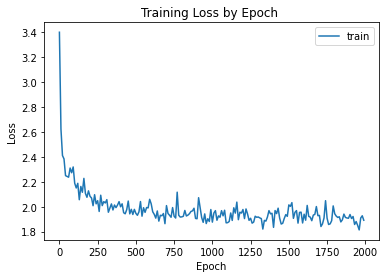

In [23]:
import matplotlib.pyplot as plt

print(len(all_losses))
X = [i * plot_every for i in range(n_epochs // plot_every)]
print(len(X))


plt.plot(X, all_losses, label='train')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss by Epoch ")
plt.legend()
plt.show()


In [26]:
print(evaluate(prime_str='G', predict_len=100, temperature=0.8))

Gladles and hearst lersery rid. In the alkne, but then bars bees thher 
and beeints I least in the st


In [28]:
for i in range(15):
  start_strings = ["Th", "wh", "he", "I", "A", "G", "You", "Ring"]
  start = random.randint(0,len(start_strings)-1)
  print("Test output #" + str(i))
  print(start_strings[start])
  print(evaluate(start_strings[start], 200), '\n')

Test output #0
You
Youn Ba about be 



am sure his 
shad vancher, houghant agugele it pliey 
shapet bee his bas with ingoor shast was the When as great said I srain behast 
orr that not slor out call our as the sulfour do 

Test output #1
Ring
Ring, befoomet spade the gange it borts of tha she strear skith 
to I stoas to rale before 
and them as nard strave off up the Stre rees the he strongely with and stood he him out had rame masn bard befor 

Test output #2
You
Yout tazy ove the have ir they cam he what and cournes have firs gran stol stire bee of the He stizarve des, backs it ift to the ride pangold 
shewass, have that if of the slieving fored the the soon it  

Test output #3
Th
Ther he 
Frodes aged 
lave 
coull in hay bafor came could and that glead rot 
waun 
shey 
times, and the sture ant 
stiren the 
to stue if ming the moord set back had he heard said borther of said shit  

Test output #4
I
I get and fit 
to 
peepled behal Gought, Gandave thway of und the They halliroug an

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**



In [38]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 100
n_layers = 3
lr = 0.01
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [39]:
n_epochs = 2000
for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
      print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
      print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0

[151.32371950149536 (200 10%) 1.8950]
Wher of undeade the turtemiscould a that mom alown add had as ber this qut as congainnce and befort co 

[312.5545029640198 (400 20%) 2.0478]
Whin
all goood he Land rear dir
on her your seg
ast and the sumbelfe she the dive. Bingles, or indeppi 

[474.3425328731537 (600 30%) 1.6951]
Wher, at he wher to the up on the cone in thatt you sister, shonsh and arcked be would him able thoul  

[635.2294631004333 (800 40%) 1.7798]
What the prollight to might; her ece any have reved and not had in upon al hard _that the Bennear and  

[779.6913125514984 (1000 50%) 1.7815]
Whion which talked strented
him of attented they feelly she its of pect I
been in the
diding is be com 

[922.5570833683014 (1200 60%) 1.6623]
Whif he her sether, houlder the
suncousing of he remasins as exchiching to groouder use Mr. That he of 

[1066.2124950885773 (1400 70%) 1.9022]
Whing you every had be said will sary to sasings the said by he some
what."

"The aw the receadmentsed 

[

200
200


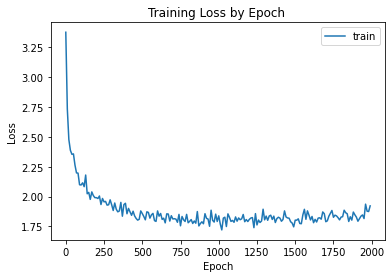

In [40]:
import matplotlib.pyplot as plt

print(len(all_losses))
X = [i * plot_every for i in range(n_epochs // plot_every)]
print(len(X))


plt.plot(X, all_losses, label='train')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss by Epoch ")
plt.legend()
plt.show()

In [43]:
for i in range(15):
  start_strings = ["Th", "wh", "he", "I", "Mr.", "A", "pl", "D", "sister", "mo","pr", "j"]
  start = random.randint(0,len(start_strings)-1)
  print("Test output #" + str(i))
  print("Prime word: " + start_strings[start]+"\n")
  print(evaluate(start_strings[start], 200), '\n')

Test output #0
Prime word: Mr.

Mr. And he a shat Mr.

The and afugh a man dorther; that was of youn, it an my your be with that wonk; nold a do the fire she at nars of am and the he to
manhicore when partry in his ready sorme oving an 

Test output #1
Prime word: A

An she counter dich he the excerfaw the how the the the shat arterablest fire was as for Mr.

"I sospected that specuted."

Chark with know makent my manest fard intre hich he be so my deit inverythark 

Test output #2
Prime word: wh

wh the was shour she the not priage
that a stat the she the sather, with that warry,, the it, and convan dies who pres in by roded his sat his noll the read my shad, spernegann have repomnt han
to loode 

Test output #3
Prime word: Th

Thought wire had the whied the contron the and by in hered to be aderen saking at on we the whighty werent them. Mr. When to laction, what But again to che grathartayd to a he so
the arity turn; this an 

Test output #4
Prime word: he

hent the
her at nevers sh

## Model Evaluation

I trained this RNN on the text dataset of Pride and Prejudice.

My model's performance was interesting. Not every output generated was of the same quality, but every once in a while you get one that almost reads like normal until you look more closely.

Things that went well:
* You can tell that it is making an effort to put together names. In the output examples there are strings like "Dart" and "Elizuf-rode" or "Elizabevich" (Darcy and Elizabeth), so it is clear that the model is getting something out of the text and recognizing patterns.
* Since Pride and Prejudice is a text with a lot of quotations and speaking, I was suprised to see examples of open and closed quotes with decently reasonable text in them.
* Similarly, the output attempts to use semicolons, commas, and other punctuations in ways that are not actually all that unnatural which impressed me.

Things that did not go so well:
* It still really likes to make up words. There are a fair amount of correctly spelled words, usually thrown around in a nonsensical order, but there are also a lot of words that make no sense. Some of the output strings read more like a romanization of a foreign language than English.
* It gets caught up in repetition when dealing with symobols and new lines. In the last output example, the model printed a - character, which lead it to print another 4 after that first one. It will also print multiple newlines randomly when it gets one, which is understandable since the text file did contain things like multiple new lines in breaks between chapters and such. Somethings like that are hard to avoid when the input is formatted a certain way, might be something to play with more carefully in the future.

Overall, while the model did not produce much convicing output, I was still pleasantly surprised to see snippets from it that sounded like it could have been from the book, especially given how frustrating it was to get the model to produce anything recognizable when I started the project.